# Animation using FuncAnimation

#### The zip folder contains the original jupyter notebook (.ipynb), which can be executed either on local jupyter or on this server. It also contains the exported LaTeX version of the notebook. I have used the numpy and matplotlib libraries in this notebook. I have also used the FuncAnimation subclass to animate the plots.

In [1]:
# Magic command below to enable interactivity in the JupyterLab interface
%matplotlib ipympl
# Some basic imports that are useful
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

First, we initialize the plot (using `init`) and the `update` function. The `update` function is called once for each frame in frames (one of the arguments of FuncAnimation), and displays the plot once per frame, making the plot look animated.

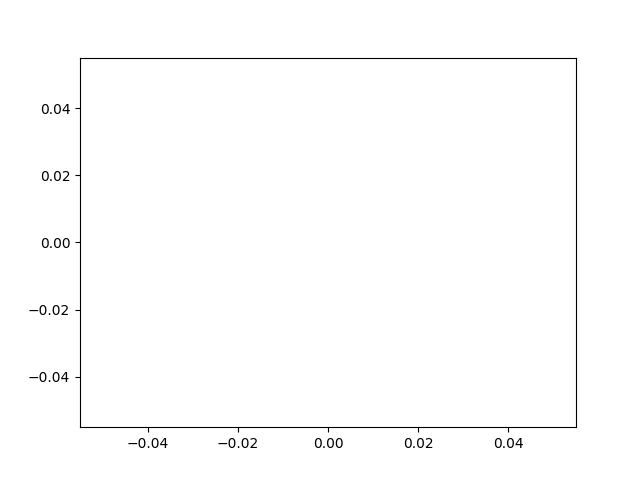

In [2]:
fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = ax.plot([], [], 'r')
def init(): # initializing the axes limits for the plot being displayed
    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-1.2, 1.2)
    return ln,
def update(frame):
    s = int(frame/fps) # this gives the index of the shape whose points we want to extract from xt (list of lists). This shape is the initial shape, it will transform into the shape with index right after this 
    f = (frame%fps)/fps # this gives the frame number for the current transformation. Each transformation will have "fps" frames, and we divide by fps to map to the 0-1 interval (alpha)
    xdata, ydata = morph(xt[s+1], yt[s+1], xt[s], yt[s], f) # get updated parameters from morph, to be displayed.
    ln.set_data(xdata, ydata)
    return ln,


We also define a function, `morph`. This function gets called through `update` once per frame, and returns the updated values of the x and y coordinates to be displayed at that timestamp. Here, we are using the "weighted average" method to get points to travel from point A to point B.

In [3]:
def morph(x1, y1, x2, y2, alpha):
    xm = alpha * x1 + (1-alpha) * x2
    ym = alpha * y1 + (1-alpha) * y2
    return xm, ym

Next, we define some helper functions:

`vertex` finds the vertices of an n-sided regular polygon, given the number of sides (n). 

In [4]:
def vertex(n): 
    theta = np.pi *(2/n)
    xcoord = []
    ycoord = []
    for i in range(n):
        xcoord.append(np.cos(i*theta))
        ycoord.append(np.sin(i*theta))
    xcoord.append(1) # appending (1,0) at the end to be able to draw complete figure
    ycoord.append(0)
    return xcoord, ycoord

`points` returns a list of a specific number of points (n) for any polygon, given the list of vertices' coordinates

In [5]:
def points(vx, vy, n): 
    x = []
    y = []
    no = len(vx) - 1
    if n % no != 0: # throwing an exception if the number of points cannot be evenly divided among the sides
        raise BaseException(f"Number of points should be multiple of {n}...")
    for i in range(1, len(vx)):
        x1 = vx[i-1]
        x2 = vx[i]
        y1 = vy[i-1]
        y2 = vy[i]
        # m = (y2 - y1)/(x2 - x1)
        # c = y1 - m * x1
        xtemp = np.linspace(x1, x2, int(n/(len(vx)-1)))
        ytemp = np.linspace(y1, y2, int(n/(len(vx)-1)))
        for j in range(len(xtemp)):
            x.append(xtemp[j])
            y.append(ytemp[j])
    return x, y
        

Now, we integrate the above helper functions into a single function, `polygen`, which generates a specific numer of points lying on a regular polygon, given the number of sides of the polygon, and the total number of points we want to generate.

In [6]:
def polygen(sides, nopoints):
    a, b = vertex(sides) # get vertices 
    xplot, yplot = points(a, b, nopoints) # get points between vertices
    return np.array(xplot), np.array(yplot)

Finally, we generate a list of the points of all polygons in their order of displaying, and call `FuncAnimation` to animate this transition.

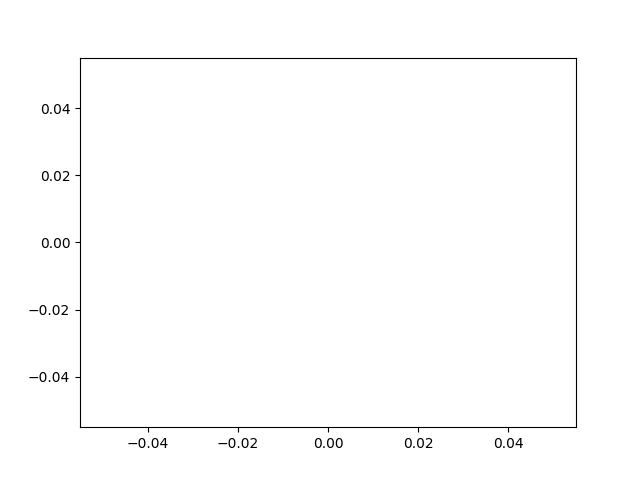

In [7]:
t = 2520 # total number of points to be generated for each polygon
xt = []
yt = []
for i in range(3, 9): # generating points from triangle to octagon and storing them all in a single list of lists
    xc1, yc1 = polygen(i, t)
    xt.append(xc1)
    yt.append(yc1)
xtinv = xt[::-1][1:] # appending the polygon vertices in the reverse order as well, for reverse animation
ytinv = yt[::-1][1:]
xt = xt + xtinv
yt = yt + ytinv
fps = 256
ani = FuncAnimation(fig, update, frames=np.array(list(range(fps*(len(xt)-1)))),
init_func=init, blit=True, interval=5, repeat=False) # calling FuncAnimation for animating from triangle to octagon and back to triangle.
plt.show()

The above plot looks different from the animation we have been given, because here, we take a weighted average of the corresponding points on the two plots, and use this to animate it. Hence, different points move at different speeds. However, the plot we have been given splits each vertex into two and moves them to the nearest vertices, which has been shown below.

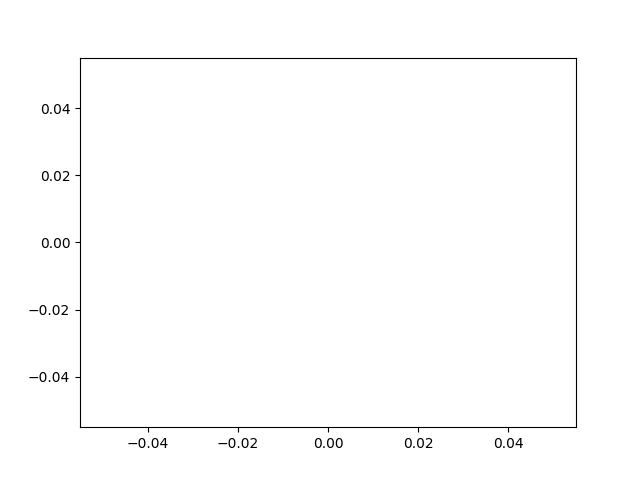

In [8]:
fig, ax = plt.subplots() # reinitializing the plot to empty plot
xdata, ydata = [], []
ln, = ax.plot([], [], 'r')
def init():
    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-1.2, 1.2)
    return ln,
def update(frame):
    s = int(frame/fps)
    f = (frame%fps)/fps
    xdata, ydata = morph1(xt[s+1], yt[s+1], xt[s], yt[s], f)
    ln.set_data(xdata, ydata)
    return ln,


We define a new `morph1` function, which splits each vertex of the first figure into two, and maps it to the two nearest vertices of the next polygon. We also notice that in the given animation, the last vertex does not travel to (1,0), so we hardcode a (1,0) at the end of the list of points to be displayed. Similarly, for the reverse animation, we hardcode a (1,0) to the beginning of the list to be displayed, and then split the vertex and map it to the previous and current vertex of the new figure. 

In [9]:
def morph1(x1, y1, x2, y2, alpha): # animation goes from x2 to x1
    xm = []
    ym = []
    if(len(x2)<len(x1)): # if we are on the forward leg of the animation, ie lower sided to higher sided polygon
        for k in range(len(x2)-1): # splitting the vertices and appropriately mapping each split vertex to a corresponding vertex on the new polygon
            xm.append(alpha * x1[k] + (1-alpha) * x2[k])
            xm.append(alpha * x1[k+1] + (1-alpha) * x2[k])
            ym.append(alpha * y1[k] + (1-alpha) * y2[k])
            ym.append(alpha * y1[k+1] + (1-alpha) * y2[k])
        xm.append(1.0)
        ym.append(0.0)
    else: # if we are on the reverse leg of the animation, ie higher sided to lower sided polygon
        xm.append(1.0)
        ym.append(0.0)
        for k in range(1, len(x2)-1): # splitting the vertices and appropriately mapping each split vertex to a corresponding vertex on the new polygon
            xm.append(alpha * x1[k-1] + (1-alpha) * x2[k])
            xm.append(alpha * x1[k] + (1-alpha) * x2[k])
            ym.append(alpha * y1[k-1] + (1-alpha) * y2[k])
            ym.append(alpha * y1[k] + (1-alpha) * y2[k])
        xm[-1] = 1
        ym[-1] = 0
    return xm, ym

Calling FuncAnimation in the same way as before: 

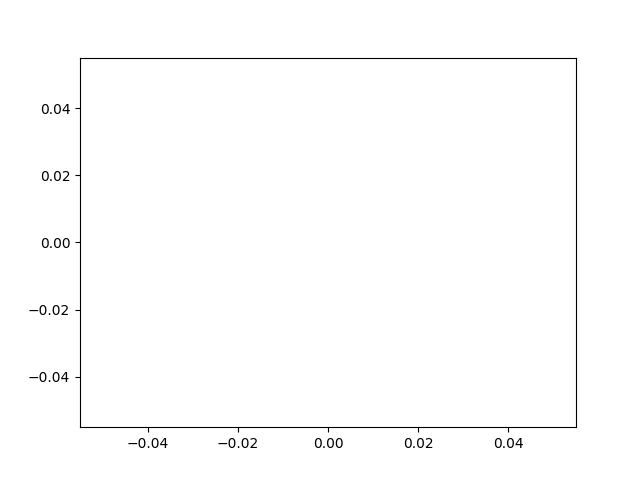

In [10]:
t = 2520
xt = []
yt = []
for i in range(3, 9):
    xc1, yc1 = vertex(i)
    xt.append(xc1)
    yt.append(yc1)
xtinv = xt[::-1][1:]
ytinv = yt[::-1][1:]
xt = xt + xtinv
yt = yt + ytinv
fps = 256
ani = FuncAnimation(fig, update, frames=np.array(list(range(fps*(len(xt)-1)))),
init_func=init, blit=True, interval=5, repeat=False)
plt.show()

This animation is exactly the same as the animation given in the assignment. Thus, by splitting vertices and mapping them appropriately to the corresponding vertices of the next polygon, we can achieve the desired effect.